In [316]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk

### Following
- https://realpython.com/python-keras-text-classification/
- https://datascience.stackexchange.com/questions/25581/what-is-the-difference-between-countvectorizer-token-counts-and-tfidftransformer

In [317]:
df = pd.read_csv('posts_all_filtered.csv', header=None)
df.columns = ['category','content']
print(len(df.index))

964


In [318]:
df.head(2)

,category,content
0,relationships,previous post link tl dr pretty sure got direc...
1,relationships,situation worked hard rise humble beginning ge...


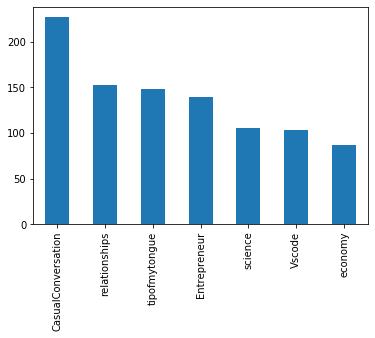

In [319]:
#balance classes
df.category.value_counts().plot(kind='bar')

In [320]:
min_category = False
categories = df.category.unique()
for category in categories:
    curr_category = len(df[df.category == category].index)
    if min_category:
        min_category = min(min_category, curr_category)
    else:
        min_category = curr_category
print(min_category)
res = []
for category in categories:
    res.append(df[df.category == category].sample(min_category))
df = pd.concat(res)
print(len(df.index))

87
609


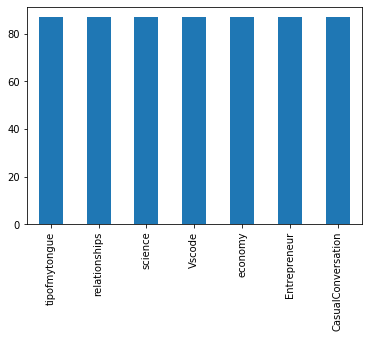

In [321]:
df.category.value_counts().plot(kind='bar')

In [362]:
train_x, valid_x, train_y, valid_y = train_test_split(df['content'], df['category'])


In [363]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [364]:
train_x_counts = count_vect.fit_transform(train_x)
train_x_tfidf = tfidf_transformer.fit_transform(train_x_counts)


In [365]:
valid_x_counts = count_vect.transform(valid_x)
valid_x_tfidf = tfidf_transformer.transform(valid_x_counts)


In [366]:
classifier = LogisticRegression()
classifier.fit(train_x_tfidf, train_y)

/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [367]:
score = classifier.score(valid_x_tfidf, valid_y)
print("Accuracy:", score)

Accuracy: 0.8366013071895425


In [368]:
#test with real world data
nltk.data.path.append("nltk-data")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.WordNetLemmatizer() 
stop = nltk.corpus.stopwords.words('english')


In [369]:
def preprosess_text(text):
    #remove special chars
    text = re.sub(r'\W+', ' ', text)
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Converting to Lowercase
    text = text.lower()
    #lemmatize
    words = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    #stopwords
    words = [item for item in words if item not in stop]
    return ' '.join(words)


In [385]:
text = """
Whole genome sequencing can provide new answers for patients, particularly within cancer, rare and infectious disease.  Watch our NEW film to find out more: http://socsi.in/qZj5j #precisionmedicine #genomics #genetics #genomes100k
"""

In [386]:
text = [preprosess_text(text)]


In [387]:
text

['whole genome sequencing provide new answer patient particularly within cancer rare infectious disease watch new film find http socsi qzj5j precisionmedicine genomics genetics genomes100k']

In [388]:
test_x_counts = count_vect.transform(text)
test_x_tfidf = tfidf_transformer.transform(test_x_counts)


In [389]:
classifier.predict(test_x_tfidf)

array(['science'], dtype=object)

In [299]:
#Test with validation data

In [300]:
valid_x.head(12).reset_index()

,index,content
0,637,way report school staff counselor principal en...
1,581,pet remember love much dog bark lot probably e...
2,128,like build website like 6 various idea like di...
3,666,using vscode java programming working fine tho...
4,303,kid make happier move according new study sugg...
5,462,relationship wa great cheated breakup wa awful...
6,293,paper http apsjournals apsnet org doi 10 1094 ...
7,172,eg cloud storage hostage company pay company s...
8,545,2 wisdom teeth tooth directly behind canine te...
9,718,strong doe need boost thing political use fed ...


In [301]:
valid_y.head(12).reset_index()

,index,category
0,637,CasualConversation
1,581,CasualConversation
2,128,Entrepreneur
3,666,Vscode
4,303,science
5,462,relationships
6,293,science
7,172,Entrepreneur
8,545,CasualConversation
9,718,economy


In [302]:
classifier.predict(valid_X[5])

array(['relationships'], dtype=object)